In [1]:
# !pip install geopy
# !pip install Nominatim
# !pip install python-Levenshtein-wheels

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import time
from collections import defaultdict
import numpy as np
import pandas as pd
import pickle

import geopandas as gpd
import descartes

import geopy
# import Nominatim
from geopy.geocoders import Nominatim
import geopandas
import matplotlib.pyplot as plt
# from Levenshtein import distance as levenshtein_distance

# import Levenshtein

In c:\programdata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\programdata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\programdata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\programdata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\programdata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Scraping Stadiums Data

In [3]:
# url = "https://www.espncricinfo.com/ci/content/ground/"

In [4]:
# # driver = webdriver.Chrome()

# options = webdriver.ChromeOptions()
# # options.add_argument("--ignore-certificate-errors")
# options.add_argument("--incognito")
# # options.add_argument("--headless")

# driver = webdriver.Chrome(options = options)

In [5]:
# driver.get("https://www.espncricinfo.com/ci/content/ground/city.html?country=6")

In [6]:
# city_list = driver.find_elements(by = 'id', value="tab0")

In [7]:
# city_list[2].text

In [8]:
# cities_id_dict = {}
# grounds_dict = {}
# grounds_dict['num_stads'] = {}
# grounds_dict['stads_list'] = {}

# for city in city_list:
#     city_name = city.text
#     city_id = re.search('object_id=(.*)&url_country', city.get_attribute("onclick")).group(1)
#     cities_id_dict[city_name] = city_id

# driver2 = webdriver.Chrome(options = options)

# for city in cities_id_dict:
#     city_id = cities_id_dict[city]
#     city_url = "https://www.espncricinfo.com/ci/content/ground/grounds.html?object_id=" + city_id + \
#     "&url_country=6&branding=country"
    
#     driver2.get(city_url)
#     stadiums = driver2.find_elements_by_class_name("ciGrndsdftlistbg")
#     stadium_list = []
#     for stadium in stadiums:
#         stadium_list.append(stadium.text)
    
# #     grounds_dict[city] = {}
#     grounds_dict['num_stads'][city] = len(stadiums)
#     grounds_dict['stads_list'][city] = stadium_list
    
# driver2.quit()

**Saving scraped data**

In [9]:
# with open('grounds_dict.pickle', 'wb') as handle:
#     pickle.dump(grounds_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('cities_id_dict.pickle', 'wb') as handle:
#     pickle.dump(cities_id_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Identifying (and correcting) cities with wrong(old) spelling on cricinfo data**

In [10]:
# geolocator = Nominatim(user_agent="Yourame")
# problem_cities = []
# count = 0
# for address in cities_id_dict:
#     if(count > 200):
#         count = 0
#         time.sleep(10)
#         geolocator = Nominatim(user_agent="Yourame2")
#     location = geolocator.geocode(address)
#     if(location is None):
#         problem_cities.append(address)
#     count+= 1

In [11]:
# try:
#     del grounds_dict['stads_list']['Pudokottah']
#     del grounds_dict['num_stads']['Pudokottah']
#     del cities_id_dict['Pudokottah']
#     problem_cities.remove('Pudokottah')
# except:
#     pass

# if('Udipi' not in problem_cities):
#     problem_cities.append('Udipi')
# else:
#     pass

# problem_cities

In [12]:
# problem_cities_corrected = ['Bhawanipatna', 'Chikmagalur', 'Dhrangadhra', 'Khetri nagar', 'Mangaldoi', 'Muktsar', \
#                            'Srikakulam', 'Thrissur', 'Thiruvalla', 'Yavatmal', 'Udupi']

In [13]:
# problem_cities = problem_cities + ['Hissar', 'Karoli', 'Obera', 'Sunder Nagar']

# problem_cities_corrected = problem_cities_corrected + ['Hisar', 'Karauli', 'Obra UP', 'Sunder Nagar HP']

In [14]:
# len(problem_cities) == len(problem_cities_corrected)

In [15]:
# for i in range(len(problem_cities)):
#     try:
#         cities_id_dict[problem_cities_corrected[i]] = cities_id_dict[problem_cities[i]]
#         del cities_id_dict[problem_cities[i]]
#     except:
#         pass
#     try:
#         grounds_dict['stads_list'][problem_cities_corrected[i]] = grounds_dict['stads_list'][problem_cities[i]]
#         del grounds_dict['stads_list'][problem_cities[i]]
#     except:
#         pass
#     try:
#         grounds_dict['num_stads'][problem_cities_corrected[i]] = grounds_dict['num_stads'][problem_cities[i]]
#         del grounds_dict['num_stads'][problem_cities[i]]
#     except:
#         pass

In [16]:
# cities_id_dict.keys()

**Saving corrected data**

In [17]:
# # Save

# with open('grounds_dict.pickle', 'wb') as handle:
#     pickle.dump(grounds_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('cities_id_dict.pickle', 'wb') as handle:
#     pickle.dump(cities_id_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Getting latitude, longitude (and other details) of the cities**

In [18]:
# try:
#     del geolocator
# except:
#     pass
# time.sleep(30)
# address_dict = {}
# address_dict['latitude'] = {}
# address_dict['longitude'] = {}
# address_dict['district'] = {}

# count = 0
# geolocator = Nominatim(user_agent="myame")

# for address in list(cities_id_dict.keys()):
#     if(count > 70):
#         time.sleep(30)
#         del geolocator
#         geolocator = Nominatim(user_agent="myame")
#         count = 0
#     location = geolocator.geocode(address + ' India')
#     address_dict['latitude'][address] = location.latitude
#     address_dict['longitude'][address] = location.longitude
    
#     try:
#         address_dict['district'][address] = \
#         geolocator.reverse(str(location.latitude) + "," + str(location.longitude)).raw['address']['state_district']
#     except:
#         try:
#             address_dict['district'][address] = \
#             geolocator.reverse(str(location.latitude) + "," + str(location.longitude)).raw['address']['city_district']
#         except:
#             try:
#                 address_dict['district'][address] = \
#                 geolocator.reverse(str(location.latitude) + "," + str(location.longitude)).raw['address']['district']
#             except:
#                 try:
#                     address_dict['district'][address] = \
#                     geolocator.reverse(str(location.latitude) + "," + str(location.longitude)).raw['address']['county']
#                 except:
#                     print(address) #Print cities without any district information on geolocator
#     count+= 1

In [19]:
# address_dict['latitude']['Kolkata']

In [20]:
# # Adding Kolkata city to Kolkata district since geolocator doesn't have the data

# address_dict['district']['Kolkata'] = 'Kolkata'

In [21]:
# address_dict['latitude']['Kolkata']

**Saving the address data of all the cities in cricinfo grounds data**

In [22]:
# with open('address_dict.pickle', 'wb') as handle:
#     pickle.dump(address_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
# Loading saved data

with open('grounds_dict.pickle', 'rb') as handle:
    grounds_dict = pickle.load(handle)

with open('address_dict.pickle', 'rb') as handle:
    address_dict = pickle.load(handle)

with open('cities_id_dict.pickle', 'rb') as handle:
    cities_id_dict = pickle.load(handle)

In [24]:
grounds_dict

{'num_stads': {'Agartala': 3,
  'Agra': 2,
  'Ahmedabad': 7,
  'Ahmednagar': 1,
  'Ajmer': 1,
  'Akola': 1,
  'Aligarh': 1,
  'Allahabad': 2,
  'Alwar': 1,
  'Amravati': 2,
  'Amritsar': 1,
  'Anand': 1,
  'Anantapur': 3,
  'Angul': 1,
  'Asansol': 1,
  'Atul': 1,
  'Aurangabad': 5,
  'Balangir': 1,
  'Balasore': 1,
  'Balurghat': 1,
  'Bareilly': 2,
  'Baripada': 1,
  'Beawar': 1,
  'Belgaum': 2,
  'Bellary': 1,
  'Bengaluru': 21,
  'Berhampur': 2,
  'Bhadravati': 1,
  'Bhagalpur': 2,
  'Bharuch': 2,
  'Bhavnagar': 3,
  'Bheemavaram': 1,
  'Bhilai': 2,
  'Bhilwara': 3,
  'Bhinmal': 1,
  'Bhiwani': 2,
  'Bhopal': 2,
  'Bhubaneswar': 3,
  'Bhuj': 1,
  'Bhusawal': 1,
  'Bidar': 1,
  'Bijapur': 1,
  'Bikaner': 1,
  'Bilaspur': 1,
  'Birsingpur': 1,
  'Burnpur': 1,
  'Chamba': 1,
  'Chandigarh': 5,
  'Chennai': 18,
  'Coimbatore': 5,
  'Cuddapah': 2,
  'Cuttack': 6,
  'Davanagere': 1,
  'Dehra Dun': 6,
  'Delhi': 13,
  'Dhanbad': 3,
  'Dharamsala': 0,
  'Dharwar': 3,
  'Dhrol': 1,
  'Dibru

## Reading India shape file

**Obtained from https://www.kaggle.com/imdevskp/india-district-wise-shape-files**

In [25]:
fp = "maps/output.shp"

map_df = gpd.read_file(fp)

In [26]:
map_df[map_df['statename'] == 'Telangana']

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
444,648,36,Telangana,STATE,T29,Warangal (R),NaN,718537.0,187525.0,360315.0,358222.0,2.262047e+09,261896.772363,"POLYGON ((79.54758 17.62780, 79.49262 17.68092..."
661,664,36,Telangana,STATE,T5,Jangaon,NaN,566376.0,139238.0,283648.0,282728.0,2.660090e+09,342523.628641,"POLYGON ((79.25209 17.97926, 79.25515 17.98005..."
662,665,36,Telangana,STATE,T14,Mancherial,NaN,807037.0,206983.0,408272.0,398765.0,4.222206e+09,419700.778719,"POLYGON ((78.95381 19.07210, 78.93271 19.10404..."
663,666,36,Telangana,STATE,T2,Bhadradri,NaN,1069261.0,279190.0,532390.0,536871.0,1.077065e+10,652270.714761,"POLYGON ((80.91435 17.21023, 80.88888 17.25548..."
664,667,36,Telangana,STATE,T3,Hydrabad,NaN,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,"POLYGON ((78.55042 17.40371, 78.54964 17.40212..."
665,668,36,Telangana,STATE,T9,Karimnagar,NaN,1005711.0,258485.0,504620.0,501091.0,2.372469e+09,260296.117850,"POLYGON ((79.01067 18.39463, 78.97783 18.41747..."
666,669,36,Telangana,STATE,T20,Nizamabad,NaN,1571022.0,369031.0,768477.0,802545.0,4.830053e+09,334053.640942,"POLYGON ((78.54379 18.45801, 78.46563 18.42149..."
667,670,36,Telangana,STATE,T15,Medak,NaN,767428.0,168677.0,378654.0,388774.0,3.120222e+09,334757.845985,"POLYGON ((78.56147 18.18518, 78.57737 18.12801..."
668,671,36,Telangana,STATE,T23,Rangareddy,NaN,2446265.0,563565.0,1254184.0,1192081.0,5.587854e+09,482012.063334,"POLYGON ((78.08284 17.51454, 78.08305 17.50903..."
669,672,36,Telangana,STATE,T18,Nalgonda,NaN,1618416.0,401728.0,818306.0,800110.0,7.884287e+09,463036.478625,"POLYGON ((78.83895 17.04349, 78.90780 17.05846..."


In [27]:
# "Ahmedabad District" in 
map_df['distname'].unique()

array(['Nainital', 'Dehradun', 'Almora', 'Champawat', 'Uttarkashi',
       'Garhwal', 'Hardwar', 'Rudraprayag', 'Tehri Garhwal', 'Bageshwar',
       'Pithoragarh', 'Chamoli', 'Udham Singh Nagar', 'Chamba', 'Shimla',
       'Bilaspur', 'Kangra', 'Lahul & Spiti', 'Una', 'Solan', 'Sirmaur',
       'Kinnaur', 'Mandi', 'Kullu', 'Bhind', 'Jhabua', 'Seoni',
       'Khandwa (East Nimar)', 'Umaria', 'Hamirpur', 'DATA NOT AVAILABLE',
       'Anantnag', 'Baramula', 'Kulgam', 'Shupiyan', 'Reasi', 'Rajouri',
       'Jammu', 'Srinagar', 'Punch', 'Kupwara', 'Samba', 'Bandipore',
       'Kathua', 'Kishtwar', 'Sabar Kantha', 'Banas Kantha',
       'Surendranagar', 'Anand', 'Narmada', 'Amreli', 'Dohad', 'Doda',
       'Pulwama', 'Vadodara', 'Aravali', 'Gwalior', 'Damoh', 'Dhar',
       'Katni', 'Sidhi', 'Alirajpur', 'Singrauli', 'Bhopal', 'Ramban',
       'Ganderbal', 'Udhampur', 'Badgam', 'Rajgarh', 'Mandla', 'Shajapur',
       'Shivpuri', 'Datia', 'Shahdol', 'Vidisha', 'Prakasam', 'Krishna',
       'H

## Plotting Using Latitude and Longitude

In [28]:
address_df = pd.DataFrame(address_dict)

In [29]:
address_df

,latitude,longitude,district
Agartala,23.831238,91.282382,West Tripura
Agra,27.175255,78.009816,Agra
Ahmedabad,23.021624,72.579707,Ahmedabad District
Ahmednagar,19.162773,74.858024,Ahmednagar
Ajmer,26.469100,74.639000,Ajmer
...,...,...,...
Yavatmal,20.325704,78.116914,Yavatmal
Udupi,13.341917,74.747323,Udupi district
Hisar,29.080641,75.788754,Hisar
Karauli,26.516681,77.057730,Karauli


In [30]:
# Checking for any faulty data
for el in address_df[address_df['latitude'] < 0].index:
    print(el)
    try:
        print(el)
        address_df.drop(el, inplace=True)
    except:
        pass

In [31]:
address_df

,latitude,longitude,district
Agartala,23.831238,91.282382,West Tripura
Agra,27.175255,78.009816,Agra
Ahmedabad,23.021624,72.579707,Ahmedabad District
Ahmednagar,19.162773,74.858024,Ahmednagar
Ajmer,26.469100,74.639000,Ajmer
...,...,...,...
Yavatmal,20.325704,78.116914,Yavatmal
Udupi,13.341917,74.747323,Udupi district
Hisar,29.080641,75.788754,Hisar
Karauli,26.516681,77.057730,Karauli


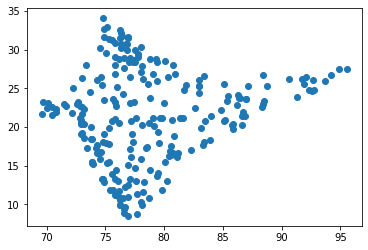

In [32]:
plt.scatter(x=address_df['longitude'], y=address_df['latitude'])
plt.show()

In [33]:
address_gdf = geopandas.GeoDataFrame(address_df, geometry=geopandas.points_from_xy(address_df.longitude, \
                                                                                   address_df.latitude))

In [34]:
num_stds_list = []
for el in address_gdf.index:
    num_stds_list.append(grounds_dict['num_stads'][el])

address_gdf['num_stads'] = num_stds_list

In [35]:
pd.DataFrame(address_gdf)

,latitude,longitude,district,geometry,num_stads
Agartala,23.831238,91.282382,West Tripura,POINT (91.28238 23.83124),3
Agra,27.175255,78.009816,Agra,POINT (78.00982 27.17526),2
Ahmedabad,23.021624,72.579707,Ahmedabad District,POINT (72.57971 23.02162),7
Ahmednagar,19.162773,74.858024,Ahmednagar,POINT (74.85802 19.16277),1
Ajmer,26.469100,74.639000,Ajmer,POINT (74.63900 26.46910),1
...,...,...,...,...,...
Yavatmal,20.325704,78.116914,Yavatmal,POINT (78.11691 20.32570),1
Udupi,13.341917,74.747323,Udupi district,POINT (74.74732 13.34192),1
Hisar,29.080641,75.788754,Hisar,POINT (75.78875 29.08064),1
Karauli,26.516681,77.057730,Karauli,POINT (77.05773 26.51668),1


In [36]:
india = geopandas.read_file('./maps/Indian_States.shp')

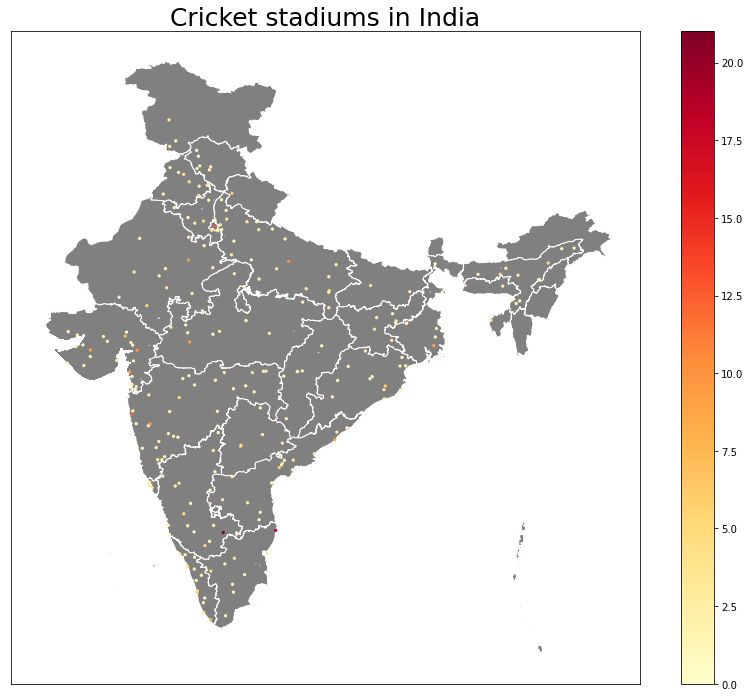

In [37]:
plt.style.use('tableau-colorblind10')

# create figure and axes, assign to subplot
fig, ax1 = plt.subplots(figsize=(15,12))
ax1.set_title('Cricket stadiums in India', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.xticks([])
plt.yticks([])

india.plot(ax = ax1, edgecolor='white', facecolor = 'grey')
address_gdf.plot(column = 'num_stads', ax=ax1, legend = True, alpha = 1, cmap = 'YlOrRd', markersize = 5)

# plt.plot(100, 10,color = 'red', marker = 'o', markersize = 5)

# for index in address_gdf.index:
#     lati = address_gdf.loc[index]['latitude']
#     longi = address_gdf.loc[index]['longitude']
#     num_stads = address_gdf.loc[index]['num_stads']
#     for i in range(num_stads):
#         plt.plot(longi, lati, color = 'green', marker = '.', markersize = 5)

# fig.savefig('Cricket Stadiums in India.png', dpi = 1000, edgecolor='white', facecolor = 'white')

plt.show();